In [1]:
import pandas as pd
import numpy as np

# Lecture de la base de données à partir du fichier CSV
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Définition des conditions pour chaque groupe
conditions = [
    original_data['region'].isin(["AUTONOME D'ABIDJAN", 'GBEKE', 'YAMOUSSOUKRO', 'GONTOUGO', 'SUD-COMOE']),
    original_data['region'].isin(['FOLON', 'BAGOUE', 'BOUNKANI', 'MARAHOUE', 'BELIER', 'GÔH', 'MORONOU', 'INDENIE-DJUABLIN', 'SAN-PEDRO', 'GBÔKLE', 'GRANDS-PONTS', 'LÔH-DJIBOUA']),
    original_data['region'].isin(['PORO', 'BERE', 'GUEMON', 'HAUT-SASSANDRA', 'NAWA', 'IFFOU', 'AGNEBY-TIASSA', 'LA ME']),
    original_data['region'].isin(['TONKPI', 'KABADOUGOU', "N'ZI", 'WORODOUGOU', 'CAVALLY', 'BAFING', 'HAMBOL', 'TCHOLOGO'])
]

# Définition des valeurs correspondantes pour chaque condition
choices = [1, 2, 3, 4]

# Création de la colonne 'Groupe'
original_data['Groupe'] = np.select(conditions, choices, default=np.nan)

# Affichage des premières lignes pour vérifier le résultat
print(original_data.head())


  country  year   hhid  grappe  menage  vague      zae              region  \
0     CIV  2018  101.0       1       1      1  ABIDJAN  AUTONOME D'ABIDJAN   
1     CIV  2018  102.0       1       2      1  ABIDJAN  AUTONOME D'ABIDJAN   
2     CIV  2018  103.0       1       3      1  ABIDJAN  AUTONOME D'ABIDJAN   
3     CIV  2018  104.0       1       4      1  ABIDJAN  AUTONOME D'ABIDJAN   
4     CIV  2018  105.0       1       5      1  ABIDJAN  AUTONOME D'ABIDJAN   

   milieu         milieu2  ...  nightlights_100m  nightlights_0m  \
0  Urbain  Abidjan urbain  ...         31.460636       31.460636   
1  Urbain  Abidjan urbain  ...         31.460636       31.460636   
2  Urbain  Abidjan urbain  ...         31.460636       31.460636   
3  Urbain  Abidjan urbain  ...         31.460636       31.460636   
4  Urbain  Abidjan urbain  ...         33.824036       31.460636   

   nightlights_50m  nightlights_20m nightlights_25m  nightlights_30m  \
0        31.460636        31.460636       31.46063

In [10]:
# Les valeurs unique de la colonne Groupe
original_data['Groupe'].unique()

array([1., 3., 2., 4.])

Groupe
1.0    2627
2.0    4338
3.0    3450
4.0    2565
Name: count, dtype: int64


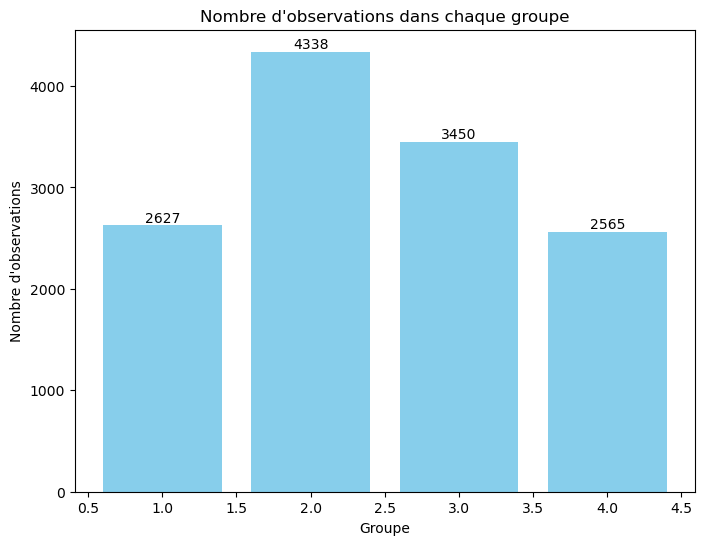

In [12]:
import matplotlib.pyplot as plt

# Comptage du nombre d'observations dans chaque groupe
group_counts = original_data['Groupe'].value_counts().sort_index()

# Affichage des résultats
print(group_counts)

# Création du graphe
plt.figure(figsize=(8, 6))
bars = plt.bar(group_counts.index, group_counts.values, color='skyblue')

# Ajout des valeurs au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Suppression des gridlines
plt.grid(False)

# Ajout du titre et des labels
plt.title("Nombre d'observations dans chaque groupe")
plt.xlabel("Groupe")
plt.ylabel("Nombre d'observations")

# Affichage du graphe
plt.show()


In [13]:
# Calcul du nombre de régions uniques dans chaque groupe
unique_regions_per_group = original_data.groupby('Groupe')['region'].nunique()

# Affichage des résultats
print(unique_regions_per_group)

Groupe
1.0     5
2.0    12
3.0     8
4.0     8
Name: region, dtype: int64


In [14]:
# Comptage des observations par région et par groupe
region_group_counts = original_data.groupby(['region', 'Groupe']).size().unstack(fill_value=0)

# Affichage des résultats
print(region_group_counts)


Groupe               1.0  2.0  3.0  4.0
region                                 
AGNEBY-TIASSA          0    0  408    0
AUTONOME D'ABIDJAN  1006    0    0    0
BAFING                 0    0    0  240
BAGOUE                 0  312    0    0
BELIER                 0  311    0    0
BERE                   0    0  312    0
BOUNKANI               0  264    0    0
CAVALLY                0    0    0  360
FOLON                  0  264    0    0
GBEKE                504    0    0    0
GBÔKLE                 0  336    0    0
GONTOUGO             408    0    0    0
GRANDS-PONTS           0  312    0    0
GUEMON                 0    0  480    0
GÔH                    0  477    0    0
HAMBOL                 0    0    0  336
HAUT-SASSANDRA         0    0  600    0
IFFOU                  0    0  287    0
INDENIE-DJUABLIN       0  384    0    0
KABADOUGOU             0    0    0  238
LA ME                  0    0  384    0
LÔH-DJIBOUA            0  432    0    0
MARAHOUE               0  478    0    0


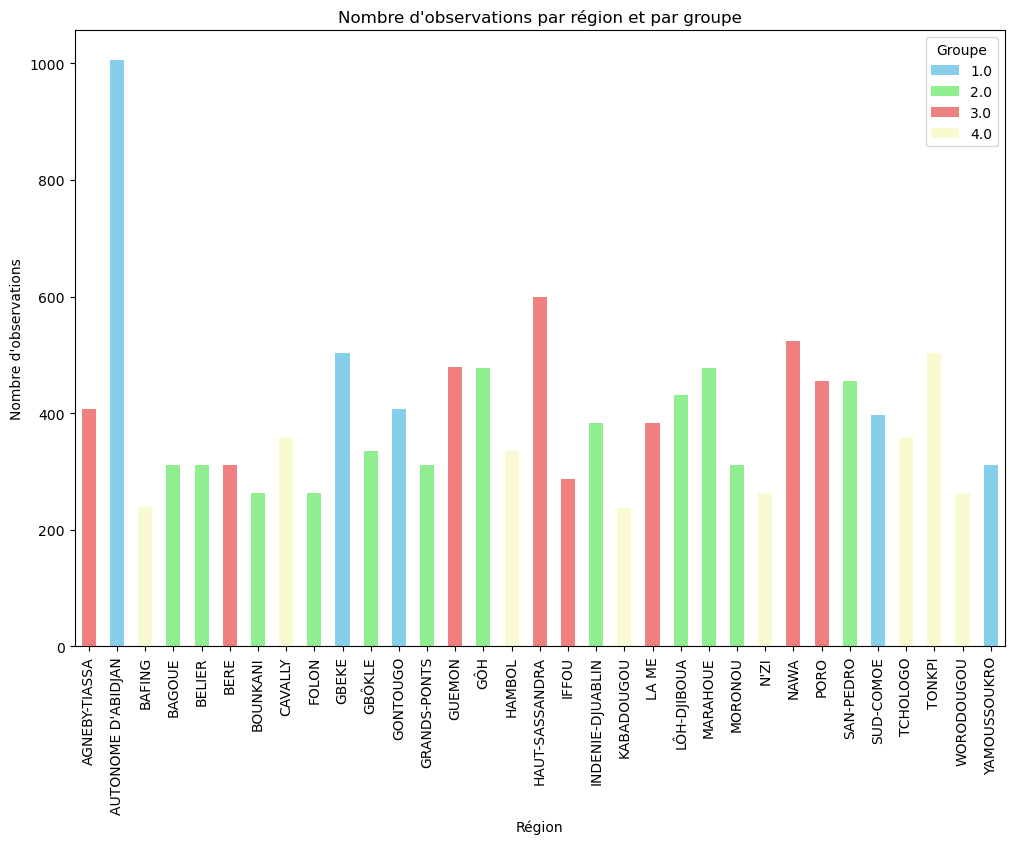

In [15]:
# Création du graphe
region_group_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow'])

# Ajout du titre et des labels
plt.title("Nombre d'observations par région et par groupe")
plt.xlabel("Région")
plt.ylabel("Nombre d'observations")
plt.xticks(rotation=90)  # Rotation des labels pour les rendre lisibles

# Suppression des gridlines
plt.grid(False)

# Affichage du graphe
plt.show()


In [16]:
# Calcul du nombre de grappes uniques dans chaque groupe
unique_grappes_per_group = original_data.groupby('Groupe')['grappe'].nunique()

# Affichage des résultats
print(unique_grappes_per_group)

Groupe
1.0    220
2.0    362
3.0    288
4.0    214
Name: grappe, dtype: int64


In [17]:
# Comptage des observations par grappe et par groupe
grappe_group_counts = original_data.groupby(['grappe', 'Groupe']).size().unstack(fill_value=0)

# Affichage des résultats
print(grappe_group_counts)


Groupe  1.0  2.0  3.0  4.0
grappe                    
1        12    0    0    0
2        12    0    0    0
3        12    0    0    0
4        12    0    0    0
5        12    0    0    0
...     ...  ...  ...  ...
1080      0   12    0    0
1081      0   12    0    0
1082      0   12    0    0
1083      0   12    0    0
1084      0   12    0    0

[1084 rows x 4 columns]


In [20]:
# Calcul du nombre de ménages par groupe et par milieu
milieu_group_counts = original_data.groupby(['milieu', 'Groupe']).size().unstack(fill_value=0)

# Affichage des résultats
print(milieu_group_counts)

Groupe   1.0   2.0   3.0   4.0
milieu                        
Rural    915  2855  2324  1618
Urbain  1712  1483  1126   947


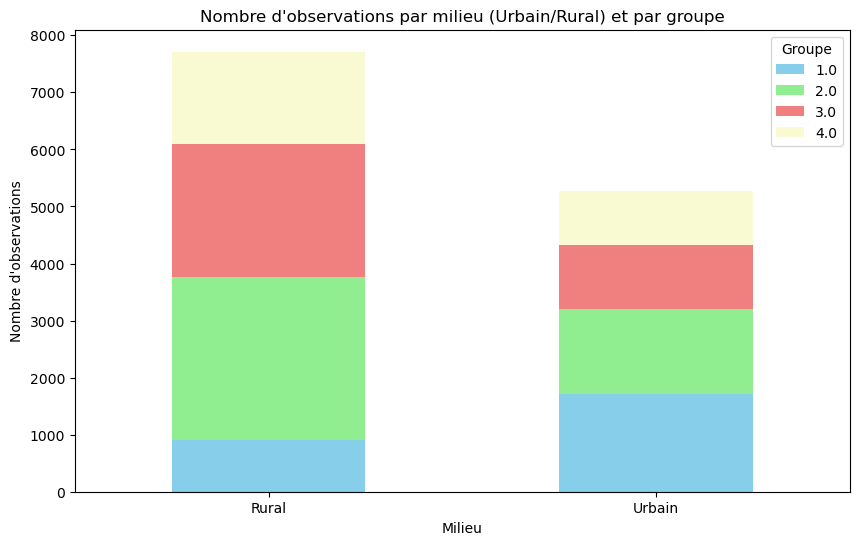

In [21]:
# Création du graphe
milieu_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow'])

# Ajout du titre et des labels
plt.title("Nombre d'observations par milieu (Urbain/Rural) et par groupe")
plt.xlabel("Milieu")
plt.ylabel("Nombre d'observations")
plt.xticks(rotation=0)  # Garde les labels horizontaux pour meilleure lisibilité

# Suppression des gridlines
plt.grid(False)

# Affichage du graphe
plt.show()


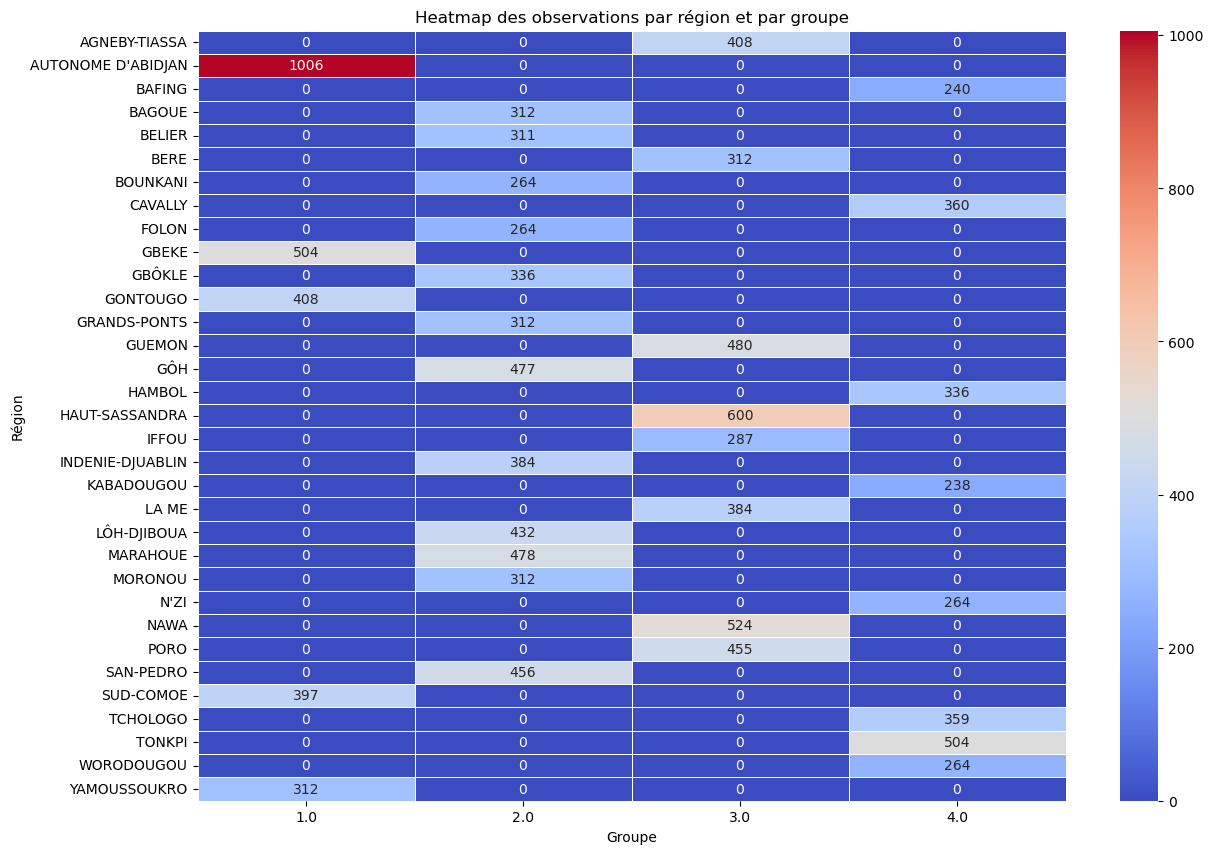

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comptage des observations par région et par groupe
region_group_counts = original_data.groupby(['region', 'Groupe']).size().unstack(fill_value=0)

# Création de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(region_group_counts, annot=True, cmap='coolwarm', linewidths=.5, fmt='d')

# Ajout du titre et des labels
plt.title("Heatmap des observations par région et par groupe")
plt.xlabel("Groupe")
plt.ylabel("Région")

# Affichage du graphe
plt.show()


In [26]:
!pip install squarify

  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/b7/3c/eedbe9fb07cc20fd9a8423da14b03bc270d0570b3ba9174a4497156a2152/squarify-0.4.4-py3-none-any.whl.metadata


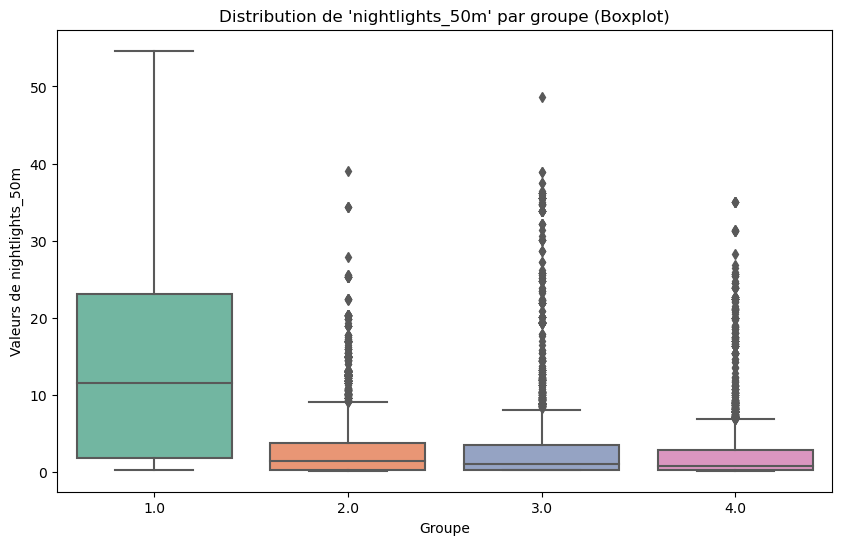

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Groupe', y='nightlights_50m', data=original_data, palette='Set2')

# Ajout du titre et des labels
plt.title("Distribution de 'nightlights_50m' par groupe (Boxplot)")
plt.xlabel("Groupe")
plt.ylabel("Valeurs de nightlights_50m")

# Affichage du graphe
plt.show()


c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


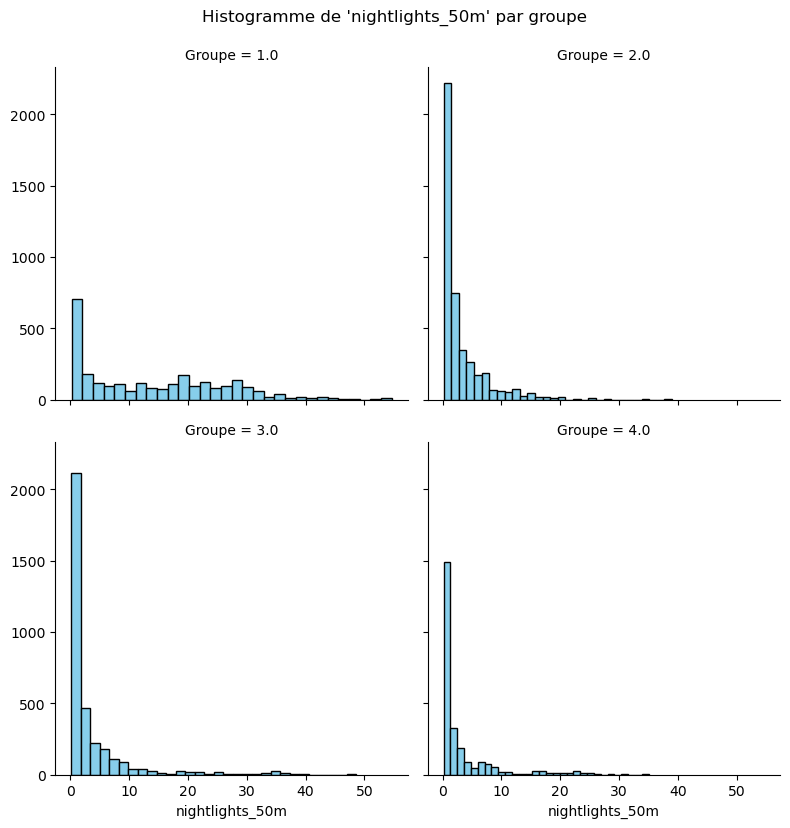

In [30]:
# Création du FacetGrid avec histogramme
g = sns.FacetGrid(original_data, col='Groupe', col_wrap=2, height=4)
g.map(plt.hist, 'nightlights_50m', bins=30, color='skyblue', edgecolor='black')

# Ajout du titre
g.fig.suptitle("Histogramme de 'nightlights_50m' par groupe", y=1.03)

# Affichage du graphe
plt.show()


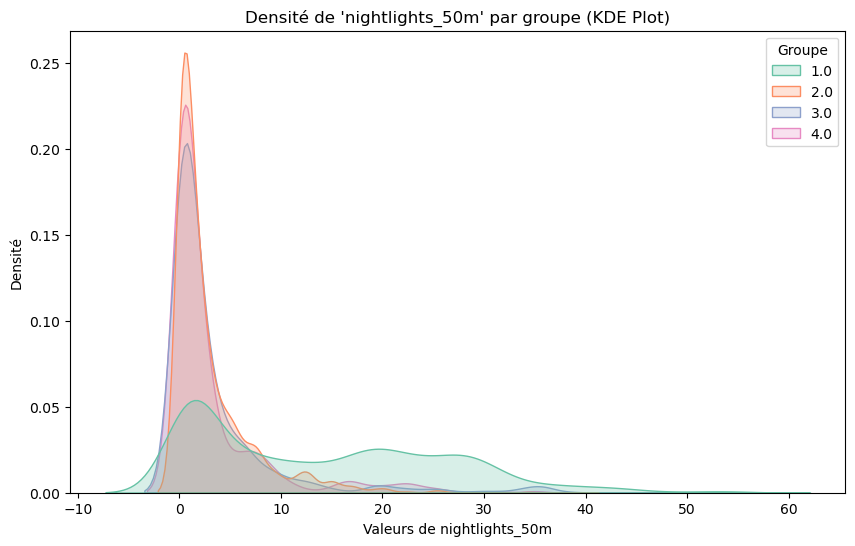

In [31]:
# Création du KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=original_data, x='nightlights_50m', hue='Groupe', fill=True, common_norm=False, palette='Set2')

# Ajout du titre et des labels
plt.title("Densité de 'nightlights_50m' par groupe (KDE Plot)")
plt.xlabel("Valeurs de nightlights_50m")
plt.ylabel("Densité")

# Affichage du graphe
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_2408\1435177995.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Groupe', y='nightlights_50m', data=original_data, palette='Set1', size=3)
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 75.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.1% of the poin

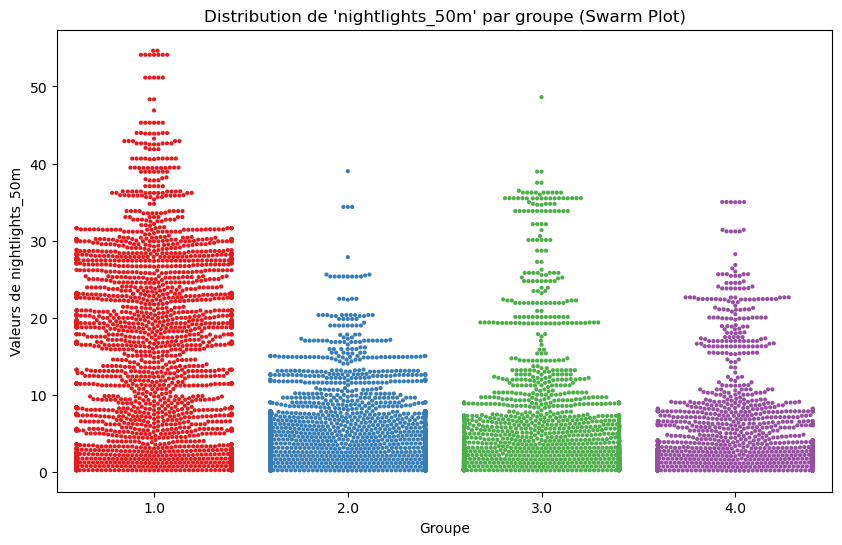

In [32]:
# Création du swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Groupe', y='nightlights_50m', data=original_data, palette='Set1', size=3)

# Ajout du titre et des labels
plt.title("Distribution de 'nightlights_50m' par groupe (Swarm Plot)")
plt.xlabel("Groupe")
plt.ylabel("Valeurs de nightlights_50m")

# Affichage du graphe
plt.show()


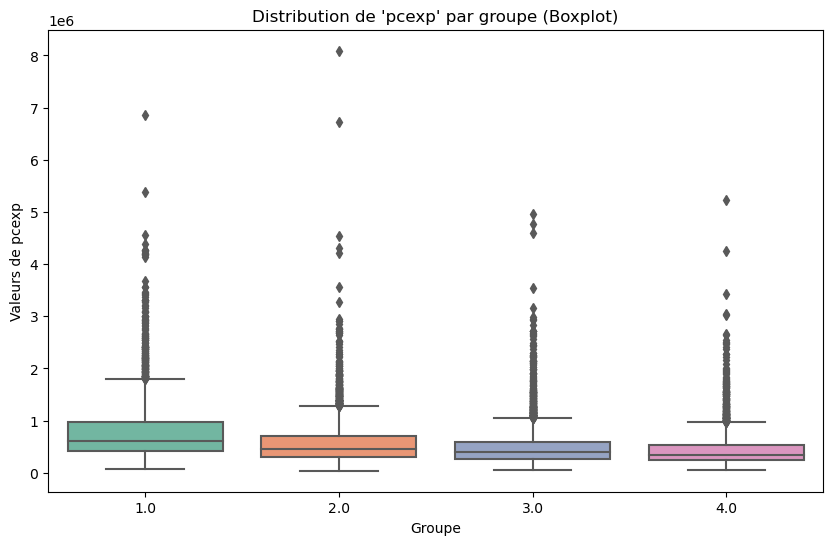

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Groupe', y='pcexp', data=original_data, palette='Set2')

# Ajout du titre et des labels
plt.title("Distribution de 'pcexp' par groupe (Boxplot)")
plt.xlabel("Groupe")
plt.ylabel("Valeurs de pcexp")

# Affichage du graphe
plt.show()


c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


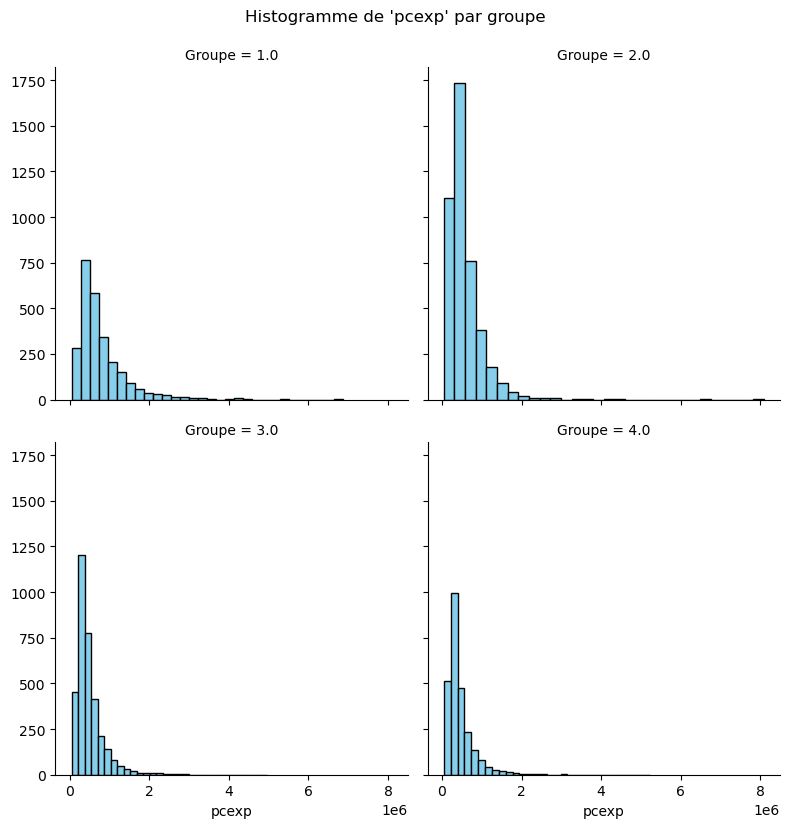

In [35]:
# Création du FacetGrid avec histogramme
g = sns.FacetGrid(original_data, col='Groupe', col_wrap=2, height=4)
g.map(plt.hist, 'pcexp', bins=30, color='skyblue', edgecolor='black')

# Ajout du titre
g.fig.suptitle("Histogramme de 'pcexp' par groupe", y=1.03)

# Affichage du graphe
plt.show()


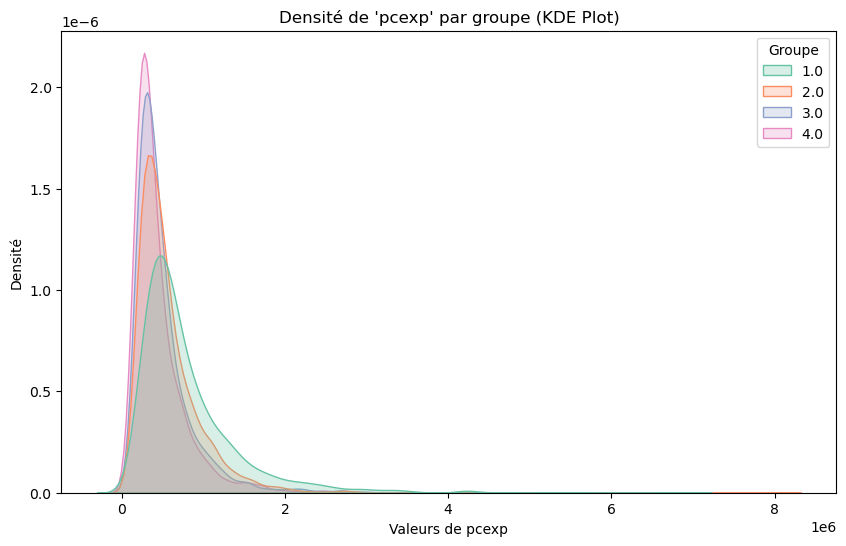

In [36]:
# Création du KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=original_data, x='pcexp', hue='Groupe', fill=True, common_norm=False, palette='Set2')

# Ajout du titre et des labels
plt.title("Densité de 'pcexp' par groupe (KDE Plot)")
plt.xlabel("Valeurs de pcexp")
plt.ylabel("Densité")

# Affichage du graphe
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_2408\3414877229.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Groupe', y='pcexp', data=original_data, palette='Set1', size=3)
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.7% of the points cannot 

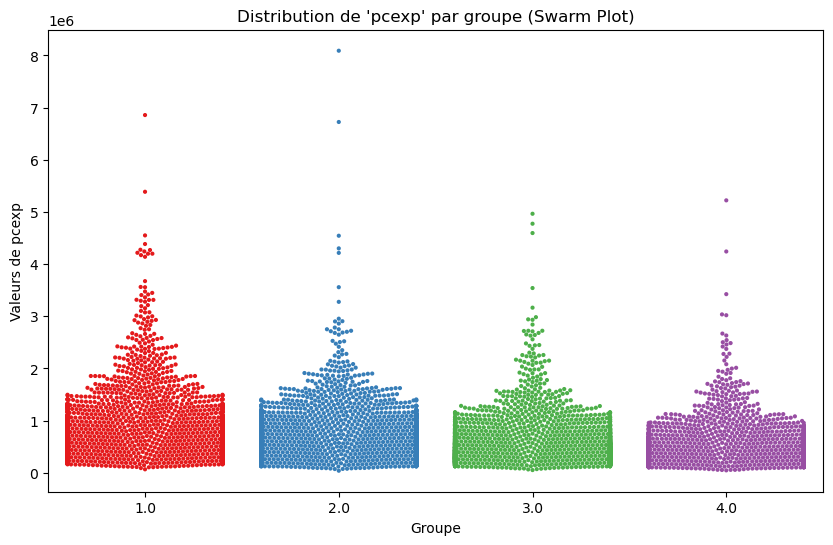

In [37]:
# Création du swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Groupe', y='pcexp', data=original_data, palette='Set1', size=3)

# Ajout du titre et des labels
plt.title("Distribution de 'pcexp' par groupe (Swarm Plot)")
plt.xlabel("Groupe")
plt.ylabel("Valeurs de pcexp")

# Affichage du graphe
plt.show()


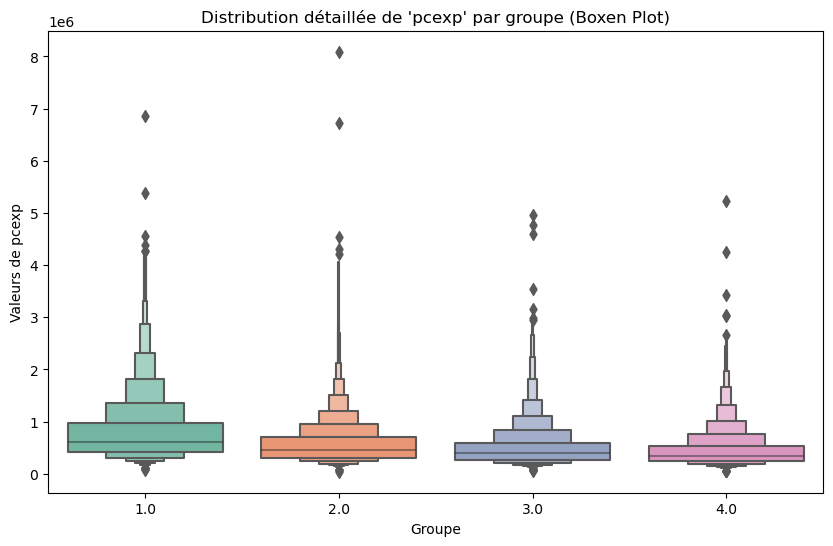

In [38]:
# Création du boxen plot
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Groupe', y='pcexp', data=original_data, palette='Set2')

# Ajout du titre et des labels
plt.title("Distribution détaillée de 'pcexp' par groupe (Boxen Plot)")
plt.xlabel("Groupe")
plt.ylabel("Valeurs de pcexp")

# Affichage du graphe
plt.show()


In [2]:
import pandas as pd
import numpy as np

# Lecture de la base de données à partir du fichier CSV
original_data = pd.read_csv(r'D:\Poverty_Predict\DataCIV2.csv')

# Définition des conditions pour chaque groupe
conditions = [
    original_data['region'].isin(["AUTONOME D'ABIDJAN", 'GBEKE', 'YAMOUSSOUKRO', 'GONTOUGO', 'SUD-COMOE']),
    original_data['region'].isin(['FOLON', 'BAGOUE', 'BOUNKANI', 'MARAHOUE', 'BELIER', 'GÔH', 'MORONOU', 'INDENIE-DJUABLIN', 'SAN-PEDRO', 'GBÔKLE', 'GRANDS-PONTS', 'LÔH-DJIBOUA']),
    original_data['region'].isin(['PORO', 'BERE', 'GUEMON', 'HAUT-SASSANDRA', 'NAWA', 'IFFOU', 'AGNEBY-TIASSA', 'LA ME']),
    original_data['region'].isin(['TONKPI', 'KABADOUGOU', "N'ZI", 'WORODOUGOU', 'CAVALLY', 'BAFING', 'HAMBOL', 'TCHOLOGO'])
]

# Définition des valeurs correspondantes pour chaque condition
choices = [1, 2, 3, 4]

# Création de la colonne 'Groupe'
original_data['Groupe'] = np.select(conditions, choices, default=np.nan)

# Affichage des premières lignes pour vérifier le résultat
print(original_data.head())

  country  year   hhid  grappe  menage  vague      zae              region  \
0     CIV  2018  101.0       1       1      1  ABIDJAN  AUTONOME D'ABIDJAN   
1     CIV  2018  102.0       1       2      1  ABIDJAN  AUTONOME D'ABIDJAN   
2     CIV  2018  103.0       1       3      1  ABIDJAN  AUTONOME D'ABIDJAN   
3     CIV  2018  104.0       1       4      1  ABIDJAN  AUTONOME D'ABIDJAN   
4     CIV  2018  105.0       1       5      1  ABIDJAN  AUTONOME D'ABIDJAN   

   milieu         milieu2  ...  nightlights_100m  nightlights_0m  \
0  Urbain  Abidjan urbain  ...         31.460636       31.460636   
1  Urbain  Abidjan urbain  ...         31.460636       31.460636   
2  Urbain  Abidjan urbain  ...         31.460636       31.460636   
3  Urbain  Abidjan urbain  ...         31.460636       31.460636   
4  Urbain  Abidjan urbain  ...         33.824036       31.460636   

   nightlights_50m  nightlights_20m nightlights_25m  nightlights_30m  \
0        31.460636        31.460636       31.46063

In [15]:
original_data['Groupe'] == 1

0         True
1         True
2         True
3         True
4         True
         ...  
12975    False
12976    False
12977    False
12978    False
12979    False
Name: Groupe, Length: 12980, dtype: bool

##### Scindons les données et calculons le taux de pauvreté
      -  Objectif final: Evaluer le taux de pauvreté dans les 4 groupes
      - On scinde notre base de donnée en 4 groupes et on sauvegarde

In [22]:
# Scinder les données en fonction de la colonne 'Groupe'
moins_pauvre_data_g1 = original_data[original_data['Groupe'] == 1]
moyen_pauvre_data_g2 = original_data[original_data['Groupe'] == 2]
pauvre_data_g3 = original_data[original_data['Groupe'] == 3]
tres_pauvre_data_g4 = original_data[original_data['Groupe'] == 4]




# Sauvegarde des deux bases de données dans des fichiers CSV séparés
moins_pauvre_data_g1.to_csv(r'D:\Poverty_Predict_Par_Region\moins_pauvre_data_g1.csv', index=False)
moyen_pauvre_data_g2.to_csv(r'D:\Poverty_Predict_Par_Region\moyen_pauvre_data_g2.csv', index=False)
pauvre_data_g3.to_csv(r'D:\Poverty_Predict_Par_Region\pauvre_data_g3.csv', index=False)
tres_pauvre_data_g4.to_csv(r'D:\Poverty_Predict_Par_Region\tres_pauvre_data_g4.csv', index=False)



In [23]:
moins_pauvre_data_g1


,country,year,hhid,grappe,menage,vague,zae,region,milieu,milieu2,...,nightlights_100m,nightlights_0m,nightlights_50m,nightlights_20m,nightlights_25m,nightlights_30m,nightlights_150m,nightlights_1000m,nightlights_5000m,Groupe
0,CIV,2018,101.0,1,1,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,31.460636,31.460636,31.460636,31.460636,31.460636,31.460636,31.460636,30.890643,25.466850,1.0
1,CIV,2018,102.0,1,2,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,31.460636,31.460636,31.460636,31.460636,31.460636,31.460636,31.460636,30.890643,25.466850,1.0
2,CIV,2018,103.0,1,3,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,31.460636,31.460636,31.460636,31.460636,31.460636,31.460636,33.824036,30.890643,25.466850,1.0
3,CIV,2018,104.0,1,4,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,31.460636,31.460636,31.460636,31.460636,31.460636,31.460636,31.460636,30.890643,25.466850,1.0
4,CIV,2018,105.0,1,5,1,ABIDJAN,AUTONOME D'ABIDJAN,Urbain,Abidjan urbain,...,33.824036,31.460636,31.460636,31.460636,31.460636,31.460636,33.824036,32.799752,26.109101,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,CIV,2019,50208.0,502,8,2,SUD-EST,SUD-COMOE,Rural,Rural,...,0.313667,0.313667,0.313667,0.313667,0.313667,0.313667,0.313667,0.293927,0.302340,1.0
6002,CIV,2019,50209.0,502,9,2,SUD-EST,SUD-COMOE,Rural,Rural,...,0.313667,0.313667,0.313667,0.313667,0.313667,0.313667,0.293809,0.293927,0.302340,1.0
6003,CIV,2019,50210.0,502,10,2,SUD-EST,SUD-COMOE,Rural,Rural,...,0.303937,0.303937,0.303937,0.303937,0.303937,0.303937,0.303937,0.293416,0.361096,1.0
6004,CIV,2019,50211.0,502,11,2,SUD-EST,SUD-COMOE,Rural,Rural,...,0.303937,0.303937,0.303937,0.303937,0.303937,0.303937,0.303937,0.293416,0.327335,1.0


In [24]:
moyen_pauvre_data_g2

,country,year,hhid,grappe,menage,vague,zae,region,milieu,milieu2,...,nightlights_100m,nightlights_0m,nightlights_50m,nightlights_20m,nightlights_25m,nightlights_30m,nightlights_150m,nightlights_1000m,nightlights_5000m,Groupe
2565,CIV,2018,21501.0,215,1,1,SUD-EST,INDENIE-DJUABLIN,Urbain,Autre urbain,...,13.010261,13.010261,13.010261,13.010261,13.010261,13.010261,14.572376,15.399419,8.219975,2.0
2566,CIV,2018,21502.0,215,2,1,SUD-EST,INDENIE-DJUABLIN,Urbain,Autre urbain,...,14.572376,13.010261,14.572376,13.010261,13.010261,13.010261,14.572376,15.135926,8.219975,2.0
2567,CIV,2018,21504.0,215,4,1,SUD-EST,INDENIE-DJUABLIN,Urbain,Autre urbain,...,14.572376,16.134491,14.572376,14.572376,14.572376,14.572376,14.572376,15.135926,8.219975,2.0
2568,CIV,2018,21505.0,215,5,1,SUD-EST,INDENIE-DJUABLIN,Urbain,Autre urbain,...,14.572376,13.010261,14.572376,13.010261,13.010261,13.010261,14.572376,15.135926,8.219975,2.0
2569,CIV,2018,21506.0,215,6,1,SUD-EST,INDENIE-DJUABLIN,Urbain,Autre urbain,...,13.010261,13.010261,13.010261,13.010261,13.010261,13.010261,13.010261,15.399419,8.219975,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,CIV,2019,108408.0,1084,8,2,CENTRE,MORONOU,Rural,Rural,...,2.226889,2.226889,2.226889,2.226889,2.226889,2.226889,2.226889,1.216256,0.373293,2.0
12976,CIV,2019,108409.0,1084,9,2,CENTRE,MORONOU,Rural,Rural,...,1.353545,1.055968,1.055968,1.055968,1.055968,1.055968,1.353545,0.971783,0.366489,2.0
12977,CIV,2019,108410.0,1084,10,2,CENTRE,MORONOU,Rural,Rural,...,1.651123,1.651123,1.651123,1.651123,1.651123,1.651123,1.111005,1.099275,0.364386,2.0
12978,CIV,2019,108411.0,1084,11,2,CENTRE,MORONOU,Rural,Rural,...,1.111005,0.570887,0.570887,0.570887,0.570887,0.570887,1.111005,0.901179,0.364386,2.0


In [25]:
pauvre_data_g3

,country,year,hhid,grappe,menage,vague,zae,region,milieu,milieu2,...,nightlights_100m,nightlights_0m,nightlights_50m,nightlights_20m,nightlights_25m,nightlights_30m,nightlights_150m,nightlights_1000m,nightlights_5000m,Groupe
1006,CIV,2018,8501.0,85,1,1,CENTRE-OUEST,HAUT-SASSANDRA,Rural,Rural,...,1.824939,1.824939,1.824939,1.824939,1.824939,1.824939,2.303865,1.444217,0.425777,3.0
1007,CIV,2018,8502.0,85,2,1,CENTRE-OUEST,HAUT-SASSANDRA,Rural,Rural,...,1.824939,1.824939,1.824939,1.824939,1.824939,1.824939,2.195100,1.444217,0.425777,3.0
1008,CIV,2018,8503.0,85,3,1,CENTRE-OUEST,HAUT-SASSANDRA,Rural,Rural,...,2.195100,1.824939,2.195100,1.824939,1.824939,2.303865,2.195100,1.129929,0.425777,3.0
1009,CIV,2018,8504.0,85,4,1,CENTRE-OUEST,HAUT-SASSANDRA,Rural,Rural,...,1.730852,1.730852,1.730852,1.730852,1.730852,1.730852,1.730852,1.331185,0.425777,3.0
1010,CIV,2018,8505.0,85,5,1,CENTRE-OUEST,HAUT-SASSANDRA,Rural,Rural,...,2.086335,1.730852,1.730852,1.730852,1.730852,1.730852,2.086335,1.241684,0.425777,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,CIV,2019,102808.0,1028,8,2,SUD-OUEST,NAWA,Rural,Rural,...,2.471088,2.772851,2.772851,2.772851,2.772851,2.772851,2.471088,2.075677,0.673696,3.0
12305,CIV,2019,102809.0,1028,9,2,SUD-OUEST,NAWA,Rural,Rural,...,1.789254,2.169324,1.789254,2.169324,2.169324,2.169324,1.789254,1.516150,0.657946,3.0
12306,CIV,2019,102810.0,1028,10,2,SUD-OUEST,NAWA,Rural,Rural,...,2.169324,2.169324,2.169324,2.169324,2.169324,2.169324,1.789254,1.807828,0.657946,3.0
12307,CIV,2019,102811.0,1028,11,2,SUD-OUEST,NAWA,Rural,Rural,...,2.169324,2.169324,2.169324,2.169324,2.169324,2.169324,2.169324,1.807828,0.645220,3.0


In [26]:
tres_pauvre_data_g4

,country,year,hhid,grappe,menage,vague,zae,region,milieu,milieu2,...,nightlights_100m,nightlights_0m,nightlights_50m,nightlights_20m,nightlights_25m,nightlights_30m,nightlights_150m,nightlights_1000m,nightlights_5000m,Groupe
2949,CIV,2018,24701.0,247,1,1,CENTRE-OUEST,TONKPI,Urbain,Autre urbain,...,4.089442,4.089442,4.089442,4.089442,4.089442,4.089442,4.089442,3.669328,1.068215,4.0
2950,CIV,2018,24702.0,247,2,1,CENTRE-OUEST,TONKPI,Urbain,Autre urbain,...,5.343421,4.089442,4.089442,4.089442,4.089442,4.089442,5.343421,3.669328,1.006293,4.0
2951,CIV,2018,24703.0,247,3,1,CENTRE-OUEST,TONKPI,Urbain,Autre urbain,...,5.343421,4.089442,5.343421,4.089442,5.343421,5.343421,5.343421,4.363889,1.068215,4.0
2952,CIV,2018,24704.0,247,4,1,CENTRE-OUEST,TONKPI,Urbain,Autre urbain,...,5.343421,4.089442,5.343421,5.343421,5.343421,5.343421,5.343421,4.363889,1.006293,4.0
2953,CIV,2018,24705.0,247,5,1,CENTRE-OUEST,TONKPI,Urbain,Autre urbain,...,5.343421,6.597401,5.343421,5.343421,5.343421,5.343421,5.343421,4.363889,1.068215,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,CIV,2019,105808.0,1058,8,2,NORD,TCHOLOGO,Rural,Rural,...,0.271324,0.274343,0.274343,0.274343,0.274343,0.274343,0.271324,0.251452,0.271775,4.0
12664,CIV,2019,105809.0,1058,9,2,NORD,TCHOLOGO,Rural,Rural,...,0.266483,0.268306,0.266483,0.268306,0.268306,0.268306,0.266483,0.249319,0.267312,4.0
12665,CIV,2019,105810.0,1058,10,2,NORD,TCHOLOGO,Rural,Rural,...,0.268306,0.268306,0.268306,0.268306,0.268306,0.268306,0.263100,0.255356,0.267312,4.0
12666,CIV,2019,105811.0,1058,11,2,NORD,TCHOLOGO,Rural,Rural,...,0.268306,0.268306,0.268306,0.268306,0.268306,0.268306,0.268306,0.255356,0.266266,4.0


In [41]:
import pandas as pd

# Définir le seuil de pauvreté
seuil_pauvrete = 345520

# Fonction pour calculer le taux de pauvreté
def calculate_poverty_rate(data, seuil_pauvrete=345520):
    # Créer une copie du DataFrame pour éviter de modifier l'original
    data_copy = data.copy()
    
    # Filtrer les ménages sous le seuil de pauvreté
    data_copy['is_poor'] = (data_copy['pcexp'] < seuil_pauvrete).astype(int)
    
    # Calculer le total pondéré des ménages
    total_menage = (data_copy['hhsize'] * data_copy['hhweight']).sum()
    
    # Calculer le taux de pauvreté pondéré
    taux_pauvrete = (data_copy['hhsize'] * data_copy['hhweight'] * data_copy['is_poor']).sum() / total_menage
    
    return taux_pauvrete


# Calcul du taux de pauvreté du groupe 1
taux_pauvrete_groupe_1 = calculate_poverty_rate(moins_pauvre_data_g1)
print(f"Taux de pauvreté du groupe 1 : {taux_pauvrete_groupe_1:.2%}")
# Calcul du taux de pauvreté du groupe 2
taux_pauvrete_groupe_2 = calculate_poverty_rate(moyen_pauvre_data_g2)
print(f"Taux de pauvreté du groupe 2 : {taux_pauvrete_groupe_2:.2%}")
# Calcul du taux de pauvreté du groupe 3
taux_pauvrete_groupe_3 = calculate_poverty_rate(pauvre_data_g3)
print(f"Taux de pauvreté du groupe 3 : {taux_pauvrete_groupe_3:.2%}")
# Calcul du taux de pauvreté du groupe 4
taux_pauvrete_groupe_4 = calculate_poverty_rate(tres_pauvre_data_g4)
print(f"Taux de pauvreté du groupe 4 : {taux_pauvrete_groupe_4:.2%}")


# Calcul du taux de pauvreté réel
taux_pauvrete_reel = calculate_poverty_rate(original_data)
print(f"Taux de pauvreté réel: {taux_pauvrete_reel:.2%}")

Taux de pauvreté du groupe 1 : 17.02%
Taux de pauvreté du groupe 2 : 42.69%
Taux de pauvreté du groupe 3 : 51.27%
Taux de pauvreté du groupe 4 : 63.78%
Taux de pauvreté réel: 39.44%
